In [30]:
import numpy as np
import importlib
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import math
from mpl_toolkits.mplot3d import Axes3D
import pdb
import pickle
from DebugObjectModule import DebugObject


# Testing Group Velocity

## Import file conditions

In [31]:
input_fname_1 = str("input.000020_unitTest-betatron")
print("Using initial conditions from ", input_fname_1)
init = importlib.import_module(input_fname_1)
sim_name = init.simulation_name
shape_name = init.shape
xden = init.xdensity
yden = init.ydensity
xiden = init.xidensity
res = init.resolution
iter = init.iterations
mode = init.mode
fname = init.fname
debugmode = init.debugmode
x_c = init.x_c
y_c = init.y_c
xi_c = init.xi_c
px_0 = init.px_0
py_0 = init.py_0
pz_0 = init.pz_0
x_s = init.x_s
s1 = init.s1
s2 = init.s2

Using initial conditions from  input.000020_unitTest-betatron


In [32]:
file = open("./data/"+fname[:-4]+"-DEBUG.obj", 'rb') 
debug = pickle.load(file)[0]
file.close
print(debug)
print(type(debug))
print(debug.x_dat)
x_dat = debug.x_dat
y_dat = debug.y_dat
z_dat = debug.z_dat
xi_dat = debug.xi_dat
Fx_dat = debug.Fx_dat
Fy_dat = debug.Fy_dat
Fz_dat = debug.Fz_dat
px_dat = debug.px_dat
py_dat = debug.py_dat

<class 'DebugObjectModule.DebugObject'>
[[ 2.          2.          2.         ... 91.57303014 91.57461712
  91.57620411]]


Here we make an array to index iterations

In [33]:
#Create array for iterations
iterations = np.arange(0,len(xi_dat[0,:]),1)
print(iterations)

dt = 0.005 #Timestep in 1/w_p

#Create array for times
time = iterations*dt
print(time)

[    0     1     2 ... 99997 99998 99999]
[0.00000e+00 5.00000e-03 1.00000e-02 ... 4.99985e+02 4.99990e+02
 4.99995e+02]


## Beta Calculation

In [34]:
def beta(gamma):
    # Returns beta given an initial gamma
    beta = np.sqrt(1-gamma**(-2))
    return beta

#print(f"Beta for pz = {pz_0}  : {beta(pz_0):.15f}")
print(f"Beta for pz = {3.20256} : {beta(3.20256):.15f}")

def gamma(beta):
    gamma = (1-beta**2)**(-1/2)
    return gamma


beta = 0.95
gamma = gamma(beta)

print(f"Gamma for beta = {beta} : {gamma:.15f}")

pz = (gamma**2 - 1)**(1/2)
print(f"pz = {pz}")

Beta for pz = 3.20256 : 0.949999901420942
Gamma for beta = 0.95 : 3.202563076101742
pz = 3.042434922296655


## Plotting

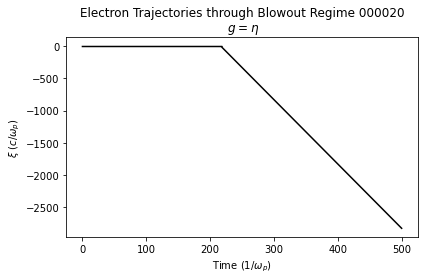

In [35]:
fig1, ax1 = plt.subplots(1)
ax1.set_xlabel(r"Time ($1/\omega_p$)")
ax1.set_ylabel(r"$\xi$ ($c/\omega_p$)")
ax1.set_title("Electron Trajectories through Blowout Regime "+fname[0:6]+"\n $g=\eta$")
ax1.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax1.plot(time, xi_dat[i,:],  'k', label='$time-Xi Trajectory') # Want vertical axis as y

fig1.tight_layout()
fig1.savefig("Group_Velocity_Test_"+fname[:-4]+".png", transparent=False)

In [36]:
print(xi_dat[0,0], xi_dat[0,-1])

-7.3 -2825.1017265156843


In [37]:
argmax = np.argmax(xi_dat[0,:])
print(argmax)

43733


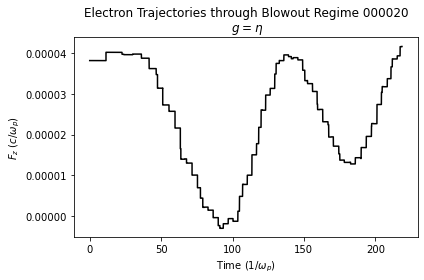

In [38]:
fig2, ax2 = plt.subplots(1)
ax2.set_xlabel(r"Time ($1/\omega_p$)")
ax2.set_ylabel(r"$F_z$ ($c/\omega_p$)")
ax2.set_title("Electron Trajectories through Blowout Regime "+fname[0:6]+"\n $g=\eta$")
ax2.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    #ax2.plot(time[0:argmax], xi_dat[i,0:argmax],  'k', label='$Z-Xi Trajectory') # Want vertical axis as y
    ax2.plot(time[0:argmax], Fz_dat[i,0:argmax],  'k', label='$Fz Trajectory') # Want vertical axis as y

fig2.tight_layout()
fig2.savefig("Group_Velocity_Test_"+fname[:-4]+"-02.png", transparent=False)

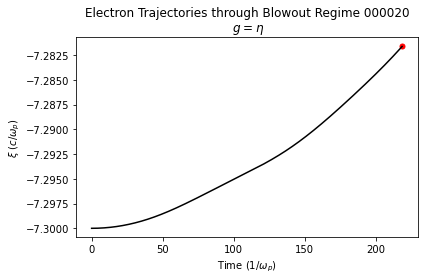

In [39]:
fig3, ax3 = plt.subplots(1)
ax3.set_xlabel(r"Time ($1/\omega_p$)")
ax3.set_ylabel(r"$\xi$ ($c/\omega_p$)")
ax3.set_title("Electron Trajectories through Blowout Regime "+fname[0:6]+"\n $g=\eta$")
ax3.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax3.plot(time[argmax], xi_dat[i,argmax], marker='o', markersize=5, color="red")
    ax3.plot(time[0:argmax], xi_dat[i,0:argmax],  'k', label='$time-Xi Trajectory') # Want vertical axis as y
    #ax3.plot(time[0:argmax], Fz_dat[i,0:argmax],  'k', label='$Fz Trajectory') # Want vertical axis as y

fig3.tight_layout()
fig3.savefig("Group_Velocity_Test_"+fname[:-4]+"-03.png", transparent=False)

# Calculating Slope up to argmax

In [40]:
print(argmax)
print(xi_dat[0,argmax])

43733
-7.281615719870274


In [43]:
slope = (xi_dat[0,argmax]-xi_dat[0,0])/(time[argmax]-time[0])
print(f"Slope = {slope}")

nu = 0.95
vz = pz/math.sqrt(1.0 + pz**2)
g = vz
expected_slope = nu - g
print(f"We expected a slope of: {expected_slope}")

Slope = 8.40750926290253e-05
We expected a slope of: 0.0


In [44]:
def Gamma(p):
        return math.sqrt(1.0 + p**2)

def Velocity(px,ptot):
    # Returns relativistic velocity from momentum
    return px / Gamma(ptot)

In [ ]:
px = px
p = math.sqrt(px**2 + py**2 + pz**2)
vx = Velocity(px, p)
vz = Velocity(pz, p)